In [2]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_table('cmu_dataset/movie.metadata.tsv', names=['Wikipedia_ID', 'Freebase_ID', 'Name', 'Release_Date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'])

In [4]:
df.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [5]:
def remove_id(s):
    res = ast.literal_eval(s)
    val = list(res.values())[:]
    return str(val)

def remove_language(s, pattern=' language'):
    s = ast.literal_eval(s)
    lang_clean=[]
    for lang in s:
        lang = lang.lower()
        lang_clean.append(str(lang).replace(pattern, ''))
    return str(lang_clean)

def remove_special_character(s):
    s = ast.literal_eval(s)
    tup_s = str(tuple(s))
    s = re.sub("[()']", '', tup_s)
    s = s.rstrip(',')
    s = s.lower()
    return str(s)



"""
test = str(['Thriller'])
print(remove_special_character(test))
print(len(remove_special_character(test)))

test = str(['English Language', 'Norwegian Language'])
print(test)
print(remove_language(test))
"""

"\ntest = str(['Thriller'])\nprint(remove_special_character(test))\nprint(len(remove_special_character(test)))\n\ntest = str(['English Language', 'Norwegian Language'])\nprint(test)\nprint(remove_language(test))\n"

In [6]:
df_copy = df.copy(deep=True)
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_id(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_language(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_special_character(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_id(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_special_character(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_id(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_special_character(x))

In [7]:
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,english,united states of america,"mystery, biographical film, drama, crime drama"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,norwegian,norway,"crime fiction, drama"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,german,germany,drama


In [8]:
#pd.set_option("display.max_rows", None)
df_copy.value_counts("Languages")

Languages
english                                                                  33748
                                                                         13866
hindi                                                                     3093
spanish                                                                   2633
silent film, english                                                      2297
                                                                         ...  
vietnamese, korean                                                           1
vietnamese, standard cantonese, english, standard mandarin, cantonese        1
vietnamese, standard cantonese, standard mandarin, english, cantonese        1
vietnamese, standard mandarin                                                1
vietnamese, standard mandarin, mandarin chinese                              1
Name: count, Length: 1814, dtype: int64

In [9]:
df_copy = df_copy[df_copy['Revenue'].notna()]

print(f"Length before removing Nan in Revenue column {len(df)}")
print(f"Length after removing Nan in Revenue {len(df_copy)}")

reduction = (len(df) - len(df_copy))/len(df)

print(f"Data reduction of {reduction:.2%}")

Length before removing Nan in Revenue column 81741
Length after removing Nan in Revenue 8401
Data reduction of 89.72%


In [10]:
df_copy.value_counts("Countries")

Countries
united states of america                                                            5484
united states of america, united kingdom                                             329
south korea                                                                          253
united kingdom                                                                       177
united states of america, germany                                                    174
                                                                                    ... 
united states of america, spain, italy, argentina                                      1
united states of america, south africa, new zealand                                    1
united states of america, south africa, united kingdom, germany                        1
united states of america, soviet union                                                 1
united states of america, united kingdom, germany, finland, ireland, netherlands       1
Name: count

In [11]:
countries_counts = df_copy['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 40
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")

Total number of countries : 91
Number of countries with more than 40 counts : 17


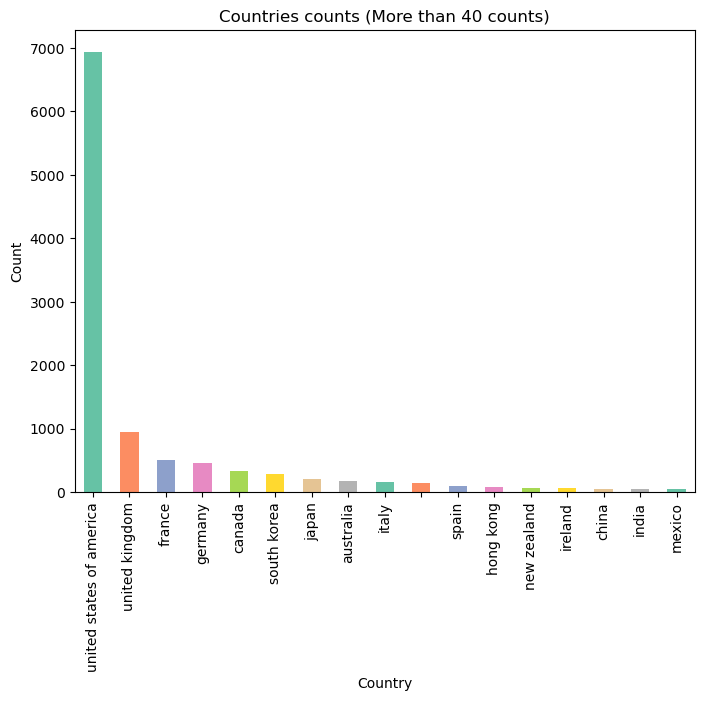

In [12]:
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [13]:
languages_counts = df_copy['Languages'].str.split(', ').explode().value_counts()
print(f"Total number of languages : {len(languages_counts)}")

count_threshold = 40
filt_languages_counts = languages_counts[languages_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_languages_counts)}")

Total number of languages : 146
Number of countries with more than 40 counts : 15


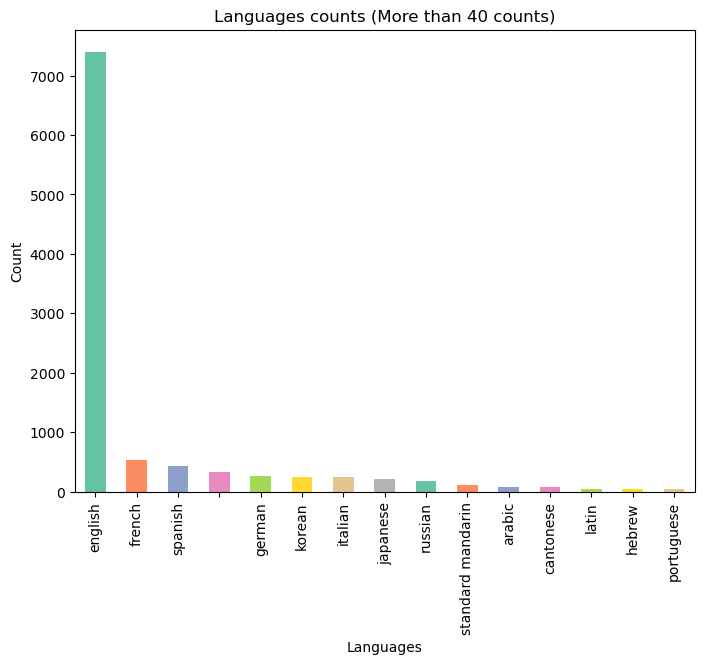

In [14]:
colors = sns.color_palette("Set2", len(filt_languages_counts))
plt.figure(figsize=(8, 6))
filt_languages_counts.plot(kind='bar', color=colors)
plt.title(f'Languages counts (More than {count_threshold} counts)')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.show()

In [15]:
def keep_year(s):
    s = str(s)
    #print(s)
    return int(s[:4])

def filter_year(year):
    if year < 1800:
        return False
    return True


"""
test = "2005-09-09"

print(keep_year(test))
"""

'\ntest = "2005-09-09"\n\nprint(keep_year(test))\n'

In [16]:
df_copy = df_copy[df_copy['Release_Date'].notna()]
df_copy.Release_Date = df_copy.Release_Date.apply(lambda x: keep_year(x))
df_copy = df_copy[df_copy['Release_Date'].apply(lambda x: filter_year(x))]
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,english,united states of america,"musical, comedy, black-and-white"
13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,english,united kingdom,"costume drama, war film, epic, period piece, d..."
17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,english,united states of america,"""childrens/family"", musical, fantasy, comedy, ..."
21,612710,/m/02wjqm,New Rose Hotel,1999,21521.0,92.0,english,united states of america,"thriller, science fiction, future noir, indie,..."


In [17]:
print(f"Minimum year is {df_copy.Release_Date.min()}")
print(f"Maximum year is {df_copy.Release_Date.max()}")

Minimum year is 1897
Maximum year is 2012


In [18]:
print(f"Minimum revenue is {df_copy.Revenue.min()}")
print(f"Maximum revenue is {df_copy.Revenue.max()}")

Minimum revenue is 10000.0
Maximum revenue is 2782275172.0


In [19]:
df_copy = df_copy.drop('Wikipedia_ID', axis=1)
df_copy = df_copy.drop('Runtime', axis=1)
df_copy = df_copy.drop('Genres', axis=1)
df_copy.head()

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries
0,/m/03vyhn,Ghosts of Mars,2001,14010832.0,english,united states of america
7,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,english,united states of america
13,/m/016ywb,Henry V,1989,10161099.0,english,united kingdom
17,/m/0kcn7,Mary Poppins,1964,102272727.0,english,united states of america
21,/m/02wjqm,New Rose Hotel,1999,21521.0,english,united states of america


In [20]:
df_copy.to_csv('../../data/cmu_cleaned.csv', index=False)

## Add columns for gross, local budget using movie_budjets
github: https://github.com/ntdoris/movie-revenue-analysis/tree/main 
in case interested in other files such as ratings, reviews, and other info

In [21]:
df_cleaned = df_copy.copy(deep=True)

In [22]:
## dataset more cleaned and with additional column production budget
df_movie_budgets = pd.read_csv('movie-revenue-analysis/zippedData/tn.movie_budgets.csv.gz')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
## less cleaed datset with missing one column, but comprises some other movies
df_movie_gross = pd.read_csv('movie-revenue-analysis/zippedData//bom.movie_gross.csv.gz')
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Manipulating

In [24]:
## DATA CLEANING FOR df_movie_budgets
# Remove dollar signs and commas, and convert columns to numeric
df_movie_budgets['production_budget'] = pd.to_numeric(df_movie_budgets['production_budget'].str.replace('[\$,]', '', regex=True))
df_movie_budgets['domestic_gross'] = pd.to_numeric(df_movie_budgets['domestic_gross'].str.replace('[\$,]', '', regex=True))
df_movie_budgets['worldwide_gross'] = pd.to_numeric(df_movie_budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True))
df_movie_budgets = df_movie_budgets.rename(columns={'movie': 'Name'})
df_movie_budgets.head()

,id,release_date,Name,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [25]:
# DATA CLEANING FOR df_movie_gross
df_movie_gross = df_movie_gross.rename(columns={'title': 'Name'})
# added the column producion budget with NaN values 
df_movie_gross['production_budget'] = [ np.nan for i in range(len(df_movie_gross))]
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors='coerce')
df_movie_gross['worldwide_gross'] = df_movie_gross['domestic_gross'] + df_movie_gross['foreign_gross']
df_movie_gross.drop(columns = ['studio', 'year', 'foreign_gross'], inplace= True)
df_movie_gross.head()

,Name,domestic_gross,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,NaN,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,NaN,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,NaN,9.603000e+08
3,Inception,292600000.0,NaN,8.283000e+08
4,Shrek Forever After,238700000.0,NaN,7.526000e+08


In [26]:
# CREATE A DATASET THAT COMBINES THE INFO OF BOTH MOVIE GROSS AND MOVIE BUDGETS
df_movie_gross['Name'] = df_movie_gross['Name'].str.strip().str.lower()
df_movie_budgets['Name'] = df_movie_budgets['Name'].str.strip().str.lower()

# Perform an outer merge on 'Name',  keeping all movies from both DataFrames
df_combined = pd.merge(
    df_movie_gross,
    df_movie_budgets[['Name', 'production_budget', 'domestic_gross', 'worldwide_gross']],
    on='Name',
    how='outer',
    suffixes=('_gross', '_budgets')
)

# Prioritize information from df_movie_budgets when available
df_combined['production_budget'] = df_combined['production_budget_budgets'].combine_first(df_combined['production_budget_gross'])
df_combined['domestic_gross'] = df_combined['domestic_gross_budgets'].combine_first(df_combined['domestic_gross_gross'])
df_combined['worldwide_gross'] = df_combined['worldwide_gross_budgets'].combine_first(df_combined['worldwide_gross_gross'])
df_combined.drop(columns=['production_budget_gross', 'production_budget_budgets', 'domestic_gross_gross', 'domestic_gross_budgets', 'worldwide_gross_gross', 'worldwide_gross_budgets'], inplace=True)
df_combined.head()


,Name,production_budget,domestic_gross,worldwide_gross
0,#horror,1500000.0,0.0,0.0
1,'71,NaN,1300000.0,1655000.0
2,(500) days of summer,7500000.0,32425665.0,34439060.0
3,"1,000 times good night",NaN,53900.0,NaN
4,10 cloverfield lane,5000000.0,72082999.0,108286422.0


In [27]:
# MERGE THE INFO INTO THE ORGINAL DTASET, IF THE MOVIE IS PRESENT
df_cleaned['Name'] = df_cleaned['Name'].str.strip().str.lower()

# Merge combined data with domestic_gross and production budget info with the cleaned original data
df_cleaned_with_budget = pd.merge(
    df_cleaned,
    df_combined[['Name', 'production_budget', 'domestic_gross', 'worldwide_gross']],
    left_on='Name',
    right_on='Name',
    how='left'
)

print(f"Number of movies with budget information added: {df_cleaned_with_budget['production_budget'].notna().sum()}")
df_cleaned_with_budget.head()

Number of movies with budget information added: 3345


,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,production_budget,domestic_gross,worldwide_gross
0,/m/03vyhn,ghosts of mars,2001,14010832.0,english,united states of america,NaN,NaN,NaN
1,/m/02qc0j7,alexander's ragtime band,1938,3600000.0,english,united states of america,2000000.0,4000000.0,4000000.0
2,/m/016ywb,henry v,1989,10161099.0,english,united kingdom,9000000.0,10161099.0,10176701.0
3,/m/0kcn7,mary poppins,1964,102272727.0,english,united states of america,6000000.0,102272145.0,102272145.0
4,/m/02wjqm,new rose hotel,1999,21521.0,english,united states of america,NaN,NaN,NaN


In [28]:
print(f"Number of rows before cleaning: {len(df_cleaned_with_budget)}")
df_cleaned_with_budget_drop = df_cleaned_with_budget.dropna()
print(f"Number of rows after cleaning: {len(df_cleaned_with_budget_drop)}")


Number of rows before cleaning: 8438
Number of rows after cleaning: 3345


In [29]:
df_cleaned_with_budget_drop.head()
## NOTA: THE WORLD_WIDE GROSS AND THE REVENUE SHOULD BE THE SAME BUT THEY ARE NOT ALWAYS THE SAME ?!?!?

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,production_budget,domestic_gross,worldwide_gross
1,/m/02qc0j7,alexander's ragtime band,1938,3600000.0,english,united states of america,2000000.0,4000000.0,4000000.0
2,/m/016ywb,henry v,1989,10161099.0,english,united kingdom,9000000.0,10161099.0,10176701.0
3,/m/0kcn7,mary poppins,1964,102272727.0,english,united states of america,6000000.0,102272145.0,102272145.0
5,/m/014k4y,baby boy,2001,29381649.0,english,united states of america,16000000.0,28734552.0,28734552.0
21,/m/09kzfd,things to do in denver when you're dead,1995,529677.0,english,united states of america,15000000.0,529766.0,529766.0


# Add Indian Movies Dataset

https://www.kaggle.com/datasets/hammadjavaid/highest-grossing-indian-movies-2023?resource=download
Highest grossing Indian movies from 2000-2023

In [229]:
df_indian = pd.read_csv('Indian_dataset/Highest grossing Indian movies.csv')
df_indian.head()

,Film,Year,Director,Studio(s),Budget (est.),World wide gross (INR),World wide gross (USD),Gross in India (INR crore),Primary Language
0,Dangal,2016,Nitesh Tiwari,Aamir Khan Productions\nUTV Motion Pictures\nW...,₹70 crore,"₹2,024 crore",317.00,538.03,Hindi
1,Baahubali 2: The Conclusion,2017,S. S. Rajamouli,Arka Media Works,₹250 crore,"₹1,810.60 crore",217.27,1416.9,Telugu\nTamil
2,RRR *,2022,S. S. Rajamouli,DVV Entertainments,₹550 crore,"₹1,316 crore",157.92,944,Telugu
3,K.G.F: Chapter 2,2022,Prashanth Neel,Hombale Films,₹100 crore,"₹1,225",147.00,"1,008",Kannada
4,Pathaan,2023,Siddharth Anand,Yash Raj Films,₹250 crore,"₹1,050.3 crore",130.00,654.28,Hindi


In [230]:
# drop useless columns, get rid of crore
df_indian.drop(columns = ['Director', 'Studio(s)', 'Budget (est.)', 'World wide gross (USD)'], inplace= True)
df_indian['World wide gross (INR)'] = pd.to_numeric(
    df_indian['World wide gross (INR)']
    .str.replace('[₹,]', '', regex=True)    # Remove ₹ and comma
    .str.replace(' crore', '', regex=True)   # Remove 'crore'
)
df_indian['Gross in India (INR crore)'] = pd.to_numeric(df_indian['Gross in India (INR crore)'].str.replace('[₹,]', '', regex=True))

df_indian = df_indian.rename(columns={
    'Film': 'Name', 
    'Gross in India (INR crore)': 'Gross in India (INR)',
    'Primary Language': 'Languages'})
df_indian['Name'] = df_indian['Name'].str.strip().str.lower()

df_indian['World wide gross (INR)'] = df_indian['World wide gross (INR)'] * 10000
df_indian['Gross in India (INR)'] = df_indian['Gross in India (INR)'] * 10000


In [231]:
# Manual replacements of NaN values

df_indian.loc[df_indian['Name'] == 'brahmāstra: part one – shiva', 'Primary Language'] = 'Hindi'
df_indian.loc[df_indian['Name'] == 'chennai express', 'Primary Language'] = 'Hindi'
df_indian.loc[df_indian['Name'] == 'ponniyin selvan: ii', 'World wide gross (INR)'] = 412619769
df_indian.loc[df_indian['Name'] == 'ponniyin selvan: ii', 'Gross in India (INR)'] = 312437220
df_indian.loc[df_indian['Name'] == 'hindi medium', 'World wide gross (INR)'] = 2896854886
df_indian.loc[df_indian['Name'] == 'hindi medium', 'Gross in India (INR)'] = 670540311

df_indian['Year'] = df_indian['Year'].replace(2911, 2011)

df_na = df_indian[df_indian.isna().any(axis=1)]
df_na

,Name,Year,World wide gross (INR),Gross in India (INR),Languages,Primary Language
0,dangal,2016,20240000.0,5380300.0,Hindi,NaN
1,baahubali 2: the conclusion,2017,18106000.0,14169000.0,Telugu\nTamil,NaN
2,rrr *,2022,13160000.0,9440000.0,Telugu,NaN
3,k.g.f: chapter 2,2022,12250000.0,10080000.0,Kannada,NaN
4,pathaan,2023,10503000.0,6542800.0,Hindi,NaN
...,...,...,...,...,...,...
100,race 2,2013,1733600.0,1395100.0,Hindi,NaN
101,bala,2019,1714900.0,1390600.0,Hindi,NaN
102,bhaag milkha bhaag,2013,1699600.0,1512900.0,Hindi,NaN
103,ek villain,2014,1696200.0,1466900.0,Hindi,NaN


In [232]:
# Add foreign and percentage columns

df_indian['Foreign Gross (INR)'] = df_indian['World wide gross (INR)'] - df_indian['Gross in India (INR)']
df_indian['foreign_percentage'] = df_indian['Foreign Gross (INR)']/df_indian['World wide gross (INR)']
df_indian['domestic_percentage'] = df_indian['Gross in India (INR)']/df_indian['World wide gross (INR)']

df_indian.head()

,Name,Year,World wide gross (INR),Gross in India (INR),Languages,Primary Language,Foreign Gross (INR),foreign_percentage,domestic_percentage
0,dangal,2016,20240000.0,5380300.0,Hindi,NaN,14859700.0,0.734175,0.265825
1,baahubali 2: the conclusion,2017,18106000.0,14169000.0,Telugu\nTamil,NaN,3937000.0,0.217442,0.782558
2,rrr *,2022,13160000.0,9440000.0,Telugu,NaN,3720000.0,0.282675,0.717325
3,k.g.f: chapter 2,2022,12250000.0,10080000.0,Kannada,NaN,2170000.0,0.177143,0.822857
4,pathaan,2023,10503000.0,6542800.0,Hindi,NaN,3960200.0,0.377054,0.622946


In [233]:
# Convert to USD based on the conversion rate of that year
# Manually found from https://www.bookmyforex.com/blog/1-usd-inr-1947-till-now/

# Initialize the DataFrame with years from 2000 to 2023
years = list(range(2000, 2024))
conversion_rates = [None] * len(years)  # Placeholder for manual input

# Create the DataFrame
df_conversion_rates = pd.DataFrame({
    'convert_year': years,
    'Conversion Rate (INR to USD)': conversion_rates
})

# Define the list of conversion rates for each year
conversion_rates = [
    44.94, 47.19, 48.61, 46.58, 45.32,  # Rates for 2000-2004
    44.10, 45.31, 41.35, 43.51, 48.41,  # Rates for 2005-2009
    45.73, 46.67, 53.44, 56.57, 62.33,  # Rates for 2010-2014
    62.97, 66.46, 67.79, 70.09, 70.39,  # Rates for 2015-2019
    76.38, 74.57, 81.35, 81.94          # Rates for 2020-2023
]

# Assign the list of conversion rates to the DataFrame
df_conversion_rates['Conversion Rate (INR to USD)'] = conversion_rates

# Merge df_indian with df_conversion_rates on the 'Year' column
df_indian = pd.merge(
    df_indian, df_conversion_rates,
    left_on='Year', right_on='convert_year',
    how='left'
)

# Convert to USD by dividing INR by the conversion rate
df_indian['worldwide_gross'] = (df_indian['World wide gross (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)
df_indian['domestic_gross'] = (df_indian['Gross in India (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)
df_indian['foreign_gross'] = (df_indian['Foreign Gross (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)

df_indian = df_indian.drop(columns=['World wide gross (INR)', 'Gross in India (INR)', 'Foreign Gross (INR)', 'Conversion Rate (INR to USD)', 'convert_year'])

In [234]:
df_indian['Countries'] = 'india'
df_indian['Languages'] = df_indian['Languages'].str.replace('[\n$,]', ' ', regex=True).str.lower()
df_indian = df_indian[['Name', 'Year', 'Countries', 'Languages', 'domestic_gross', 'domestic_percentage', 
                       'foreign_gross', 'foreign_percentage', 'worldwide_gross']]

df_indian

,Name,Year,Countries,Languages,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,dangal,2016,india,hindi,80955,0.265825,223588,0.734175,304544
1,baahubali 2: the conclusion,2017,india,telugu tamil,209013,0.782558,58076,0.217442,267089
2,rrr *,2022,india,telugu,116041,0.717325,45728,0.282675,161770
3,k.g.f: chapter 2,2022,india,kannada,123909,0.822857,26674,0.177143,150583
4,pathaan,2023,india,hindi,79848,0.622946,48330,0.377054,128179
...,...,...,...,...,...,...,...,...,...
100,race 2,2013,india,hindi,24661,0.804742,5983,0.195258,30645
101,bala,2019,india,hindi,19755,0.810893,4607,0.189107,24362
102,bhaag milkha bhaag,2013,india,hindi,26743,0.890151,3300,0.109849,30044
103,ek villain,2014,india,hindi,23534,0.864815,3678,0.135185,27213


Preliminary Analysis On India only